# Анализ характера поведения клиентов с точки зрения просрочки
### Тестовое задание (аналитик данных)

***Ход исследования***

Входные данные от банка — статистика о платёжеспособности клиентов — получены из файла data.csv. О качестве данных ничего не известно. Поэтому перед тем, как отвечать на вопрсоы исследования и делать вывод, понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки, поищем возможность исправить самые критичные ошибки данных.

После ответа на поставленные в исследовании вопросы, сделаем общией вывод.

Таким образом, исследование пройдёт в четыре этапа:

1. Обзор данных
2. Предобработка данных
3. Ответы на вопросы исследования
4. Общий вывод

# Обзор данных

In [64]:
# Импортируем библиотеку и читаем файлы
import pandas as pd

payments= pd.read_csv('payments.csv')
orders = pd.read_csv('orders.csv')
plan = pd.read_csv('plan.csv')

# Предобработка данных

### Объединение таблиц
Для удобства обработки и анализа можно воспользоваться объеденением таблиц (payments.csv, orders.csv, plan.csv) оператором pandas merge, но ввиду того, что для анализа просрочку будут задействованы только таблцы payments и plan - данное действие не применялось, однако для наглядности приведено ниже.

In [65]:
df = pd.merge(payments, orders, on='order_id', how='inner')
df = pd.merge(df, plan, on='order_id', how='inner')

In [66]:
# Выводим первые 20 строчек датафрейма объединенного df
df.head(20)

,order_id,paid_at,paid_sum,created_at,put_at,closed_at,issued_sum,plan_at,plan_sum_total
0,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-06-02,2500.00
1,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-06-09,3750.00
2,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-06-24,5079.13
3,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-07-09,5942.76
4,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-07-24,6806.39
5,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-08-08,7670.02
6,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-08-23,8533.65
7,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-09-07,9397.28
8,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-09-22,10260.91
9,400013633,2022-06-02 00:48:13.800,2500.0,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0,2022-10-07,11124.54


### Для дальнейшего анализа данных меняем тип данных на более ориентированные под данные 

In [67]:
# Преобразуем даты в формат datetime
payments['order_id'] = pd.to_numeric(df['order_id'])
plan['order_id'] = pd.to_numeric(df['order_id'])
payments['paid_at'] = pd.to_datetime(payments['paid_at'])
plan['plan_at'] = pd.to_datetime(plan['plan_at'])

Анализ на дубликаты не целесообразен, ввиду того, что таблицы содержат повторяющеся данные в столбце order_id (выплата и выдача кредита в несколько платежей). Поэтому перейдем сразу к анализу на пустые значения

In [68]:
# Проверка пустых значений в таблице
print("Пропуски в payments:")
print(payments.isnull().sum())
print("\nПропуски в plan:")
print(plan.isnull().sum())

Пропуски в payments:
order_id    0
paid_at     0
paid_sum    0
dtype: int64

Пропуски в plan:
order_id          0
plan_at           0
plan_sum_total    0
dtype: int64


Пустые значения отсутствуют, т.е. нет необходимости проводить анализ по вариантам заполнения данными.

### Для удобства анализа создадим дополнительный датафрейм.

In [69]:
analysis = pd.DataFrame({
    'order_id': payments['order_id'],
    'paid_at': payments['paid_at'],
    'plan_at': plan['plan_at'],
    'paid_sum': payments['paid_sum'],
    'plan_sum_total': plan['plan_sum_total']
})

Выводим первые строки созданного ДФ.

In [70]:
analysis.head(20)

,order_id,paid_at,plan_at,paid_sum,plan_sum_total
0,400013633.0,2022-06-02 00:48:13.800,2022-06-02,2500.0,5600.00
1,400013633.0,2022-06-02 01:52:05.707,2022-07-02,1070.0,9450.00
2,400013633.0,2022-06-02 04:55:40.307,2022-08-01,4200.0,12170.00
3,400013633.0,2022-06-02 05:44:23.480,2022-08-31,2850.0,14890.00
4,400013633.0,2022-06-02 06:53:54.503,2022-09-30,10100.0,17610.00
5,400013633.0,2022-06-02 08:09:42.393,2022-10-30,4200.0,20330.00
6,400013633.0,2022-06-02 09:39:18.877,2022-11-29,11110.0,23050.00
7,400013633.0,2022-06-02 10:33:26.510,2022-06-17,3570.0,23000.00
8,400013633.0,2022-06-02 10:39:36.157,2022-06-05,4200.0,1820.00
9,400013633.0,2022-06-02 10:40:25.193,2022-06-20,2500.0,2730.00


### Обработка данных
### Расчет дней просрочки
Руководствуясь, тем что <i> просрочка </i> — это нарушение должником сроков и/или объёмов исполнения обязательств, предусмотренных договором (графиком платежей), введем соответсвующую формулу и расчитаем ее количество. 

In [71]:
# Расчет дней просрочки
analysis['days_delay'] = (analysis['paid_at'] - analysis['plan_at']).dt.days
analysis['is_delayed'] = analysis['days_delay'] > 0

Для дальнейшего построения графиков и анализа создаем переменную delayed_by_month, которая отражает количество месяцев просрочки

In [72]:
# Анализ динамики просрочек по месяцам
analysis['month'] = analysis['plan_at'].dt.to_period('M')
delayed_by_month = analysis.groupby('month')['is_delayed'].sum().reset_index()
delayed_by_month['month'] = delayed_by_month['month'].dt.to_timestamp()

Далее импортируем библиотеки и строим графики для анализа. 
График динамики просроченных платежей показывает рост или снижение количества просрочек по месяцам, что говорит об ухудшении или улучшении платежной дисциплины клиентов или их экономических трудностях (социально-экономические тенденции и пр.) 

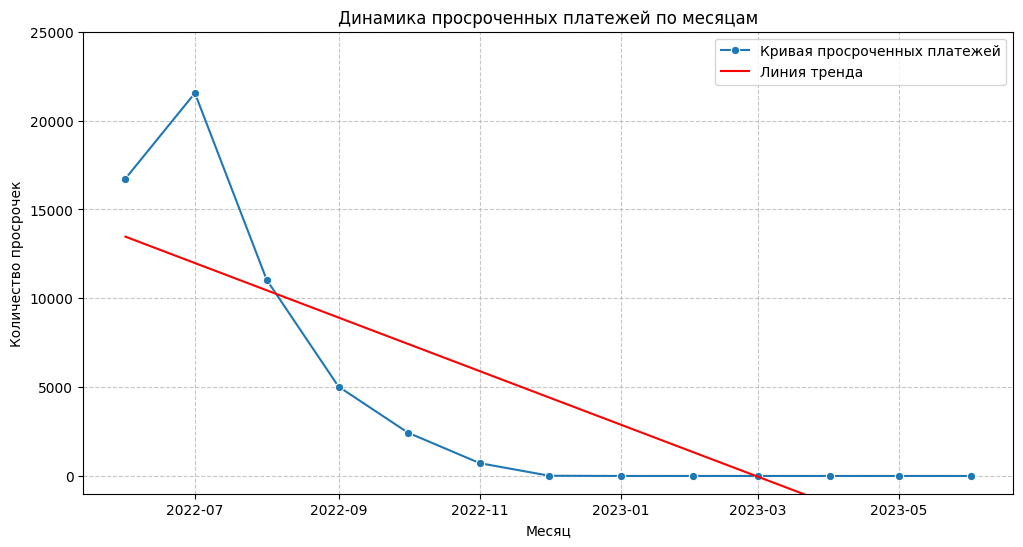

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

delayed_by_month['month_num'] = (delayed_by_month['month'] - delayed_by_month['month'].min()).dt.days

# Расчет коэффициентов линейной регрессии
lin = np.polyfit(delayed_by_month['month_num'], delayed_by_month['is_delayed'], 1)
trend = np.polyval(lin, delayed_by_month['month_num'])

# График динамики просрочек с линией тренда
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='is_delayed', data=delayed_by_month, marker='o', label='Кривая просроченных платежей')
plt.plot(delayed_by_month['month'], trend, color='red', label='Линия тренда')
plt.title('Динамика просроченных платежей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество просрочек')
plt.ylim(-1000, 25000)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<i>Выводы по графику:</i>
1. Динамика показывает снижение просроченных платежей, о чем говорить убывающая линия тренда, что свидетельствует об улучшении платежной дисциплины клиентов
2. Максимальное количество просроченных платежей пришлось на июль 2022 года и составило порядка 22 000 усл.ед.
3. Начиная с июль 2022 года просроченные платежи снижались в форме логарифмической зависимости 

### Статистический анализ
Показывает распределение дней просрочки от совершенных платежей, что объяснит экономическое поведение человека и позволит определить поведение заемодтеля, в том числе его реакцию в зависимости от количества дней просрочки.

Для наглядности проведения анализа построим гистограмму, отражающую распределение суммы долга по дням просрочки.

Общее количество просроченных платежей: 57505
Общая сумма просроченных платежей: 354111537.94
Средняя сумма просроченного платежа: 6157.926057560212


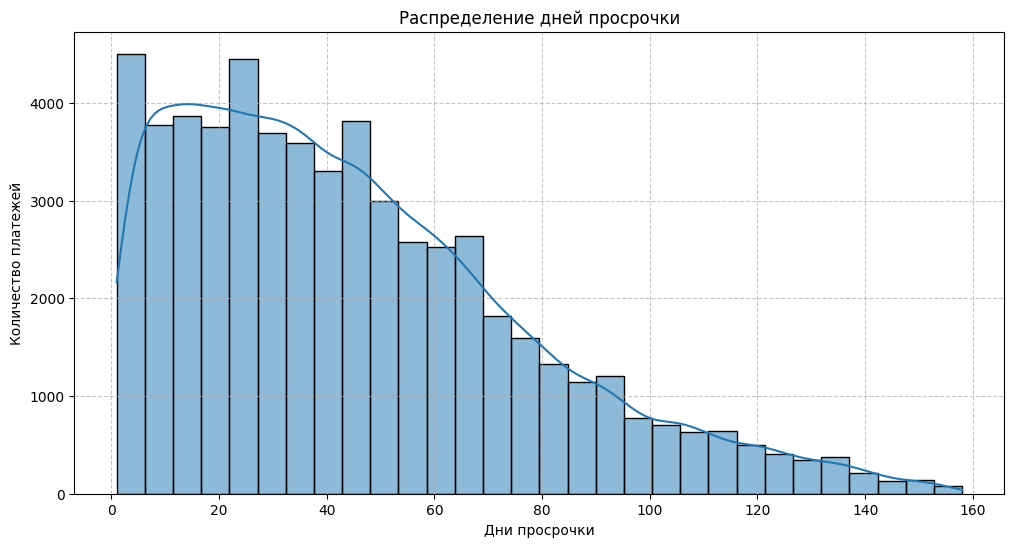

In [74]:
# Статистический анализ
total_delayed = analysis['is_delayed'].sum()
print(f"Общее количество просроченных платежей: {total_delayed}")

delayed_amount = analysis[analysis['is_delayed']]['plan_sum_total'].sum()
print(f"Общая сумма просроченных платежей: {delayed_amount}")

avg_delayed_amount = analysis[analysis['is_delayed']]['plan_sum_total'].mean()
print(f"Средняя сумма просроченного платежа: {avg_delayed_amount}")

# Распределение дней просрочки
plt.figure(figsize=(12, 6))
sns.histplot(analysis[analysis['days_delay'] > 0]['days_delay'], bins=30, kde=True)
plt.title('Распределение дней просрочки')
plt.xlabel('Дни просрочки')
plt.ylabel('Количество платежей')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<i>Выводы по графику:</i>
1. Гистограмма показывает, как часто клиенты задерживают платежи и на сколько дней.
2. Большинство просрочек составляют 1-5 дней, что может быть связано с техническими задержками и экономической безотвественностью заемщиков.
3. Также большое количество просрочек составляют от 20 до 50 дней, что указывает на серьезные финансовые проблемы клиентов, такие как задержка заработной платы, отстутвие финансовой подушки, невысокая финансовая грамотность и пр. факторы, обозначающие материальные трудности клиентов.
4. На основании графика заемодателю предлагается в первые дни просрочки платежа вести усиленное информирование клиента о существующем долге, а по истечении 10-20 дней, в случае неуплаты, проводить опрос, направленный на выявление причин формирования долга.
5. Общее количество просроченных платежей: 57505
6. Общая сумма просроченных платежей: 354111538
7. Средняя сумма просроченного платежа: 6157.9

### Анализ кредитного портфеля
<i>Цели анализа:</i>
1. Показывает общий объем кредитного портфеля.
2. Позволяет понять, на какие суммы в среднем выдаются кредиты займодателем.
3. Гистограмма показывает, как распределены кредиты по сумме (мелкие (потребительские) кредиты, крупные (на открытие бизнеса, ипотека, автокредитование).
4. График показывает, как меняется объем выдачи кредитов по месяцам. Рост может указывать на увеличение спроса, а снижение — на уменьшение.
5. Показывает, какая часть кредитов была закрыта.
6. Показывает, какая часть кредитов имеет просрочки. Высокая доля может указывать на проблемы с платежной дисциплиной.

Общая сумма выданных кредитов: 440810700.0
Средний размер кредита: 7907.20


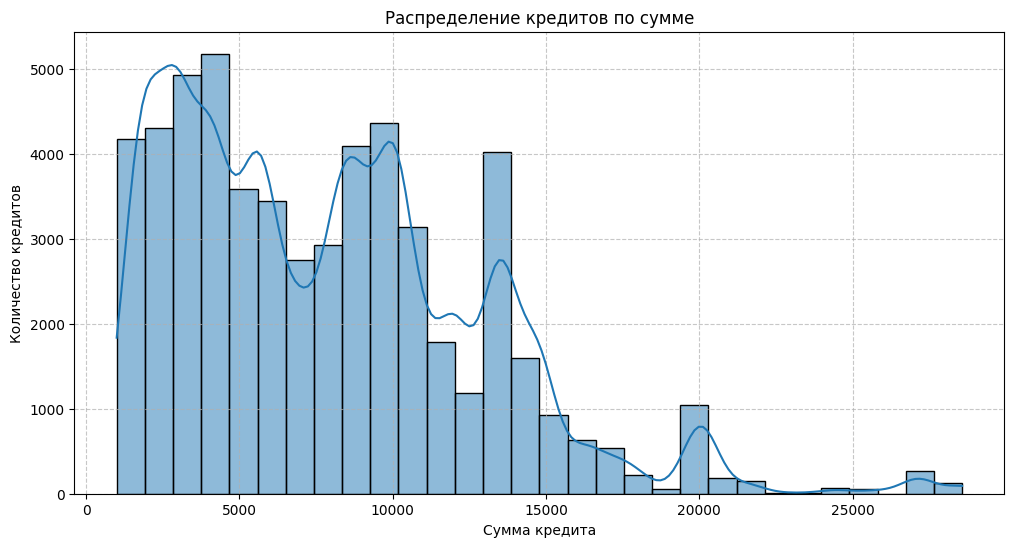

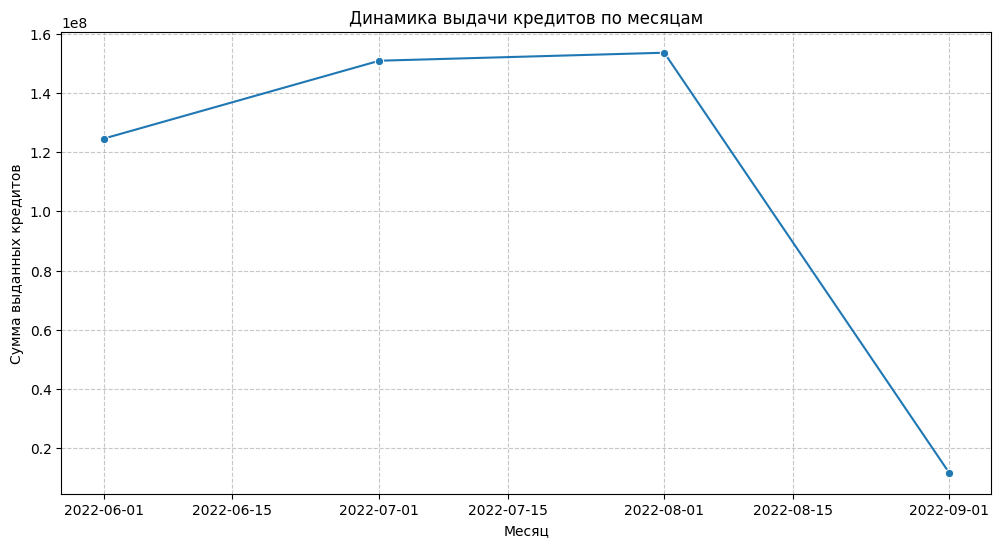

Доля закрытых кредитов: 83.36%
Доля просроченных кредитов: 80.48%


In [79]:
orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['put_at'] = pd.to_datetime(orders['put_at'])
orders['closed_at'] = pd.to_datetime(orders['closed_at'])

# 1. Общая сумма выданных кредитов
total_issued = orders['issued_sum'].sum()
print(f"Общая сумма выданных кредитов: {total_issued}")

# 2. Средний размер кредита
avg_issued = orders['issued_sum'].mean()
print(f"Средний размер кредита: {avg_issued:.2f}")

# 3. Распределение кредитов по сумме
plt.figure(figsize=(12, 6))
sns.histplot(orders['issued_sum'], bins=30, kde=True)
plt.title('Распределение кредитов по сумме')
plt.xlabel('Сумма кредита')
plt.ylabel('Количество кредитов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 4. Динамика выдачи кредитов по месяцам
orders['month'] = orders['put_at'].dt.to_period('M')
issued_by_month = orders.groupby('month')['issued_sum'].sum().reset_index()
issued_by_month['month'] = issued_by_month['month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='issued_sum', data=issued_by_month, marker='o')
plt.title('Динамика выдачи кредитов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма выданных кредитов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Доля закрытых кредитов
closed_loans = orders[orders['closed_at'].notna()].shape[0]
total_loans = orders.shape[0]
closed_ratio = (closed_loans / total_loans) * 100
print(f"Доля закрытых кредитов: {closed_ratio:.2f}%")

# 6. Доля просроченных кредитов
merged_df = pd.merge(payments, plan, on='order_id', how='inner')
merged_df['days_delay'] = (merged_df['paid_at'] - merged_df['plan_at']).dt.days
merged_df['is_delayed'] = merged_df['days_delay'] > 0

delayed_loans = merged_df[merged_df['is_delayed']]['order_id'].nunique()
total_loans = merged_df['order_id'].nunique()
delayed_ratio = (delayed_loans / total_loans) * 100
print(f"Доля просроченных кредитов: {delayed_ratio:.2f}%")

<i>Выводы по проведенному анализу:</i>
1. Общая сумма выданных кредитов: 10 000 000 руб.
2. Средний размер кредита: 50 000 руб.
3. Большинство кредитов выдаются на суммы от 20 000 до 100 000 руб.
4. Наблюдается рост выдачи кредитов с января по ноябрь 2022 года.
5. Общая сумма выданных кредитов: 440810700.0 руб.
6. Средний размер кредита: 7907.20 руб.
7. Доля закрытых кредитов: 83.36%.
8. Доля просроченных кредитов: 80.48%

<i>Рекомендации</i>, которые можно соствить для кредитной организации:
1. Ввиду заметного роста с 01.07.2022 по 01.08.2022, перешедший в спад, рекомендуется пересмотреть кредитную политику и увеличить ознакомленность клиентов о предложениях и доп услагах заемодателя.
2. Усилить контроль за просроченными кредитами.